In [6]:
from PIL import ImageDraw, Image
import json

In [50]:
img = Image.open('images/guidance_precipitationforecasts1.png')
label = json.load(open('labels/guidance_precipitationforecasts1.json'))

In [ ]:
img

In [52]:
label

[{'bbox': [53.62139892578125,
   796.900146484375,
   541.7611694335938,
   810.7430419921875],
  'lines': [{'bbox': [536.6151733398438,
     798.4866943359375,
     541.7611694335938,
     810.7430419921875],
    'spans': [{'bbox': [536.6151733398438,
       798.4866943359375,
       541.7611694335938,
       810.7430419921875],
      'text': '2',
      'size': 9.0,
      'superscript': False,
      'italic': False,
      'serifed': False,
      'sans': True,
      'monospaced': True,
      'proportional': False,
      'bold': True}]},
   {'bbox': [53.62139892578125,
     796.900146484375,
     216.0175018310547,
     810.518310546875],
    'spans': [{'bbox': [53.62139892578125,
       796.900146484375,
       216.0175018310547,
       810.518310546875],
      'text': 'CENTRE FOR HUMANITARIAN DATA',
      'size': 10.0,
      'superscript': False,
      'italic': False,
      'serifed': False,
      'sans': True,
      'monospaced': False,
      'proportional': True,
      'bold': True

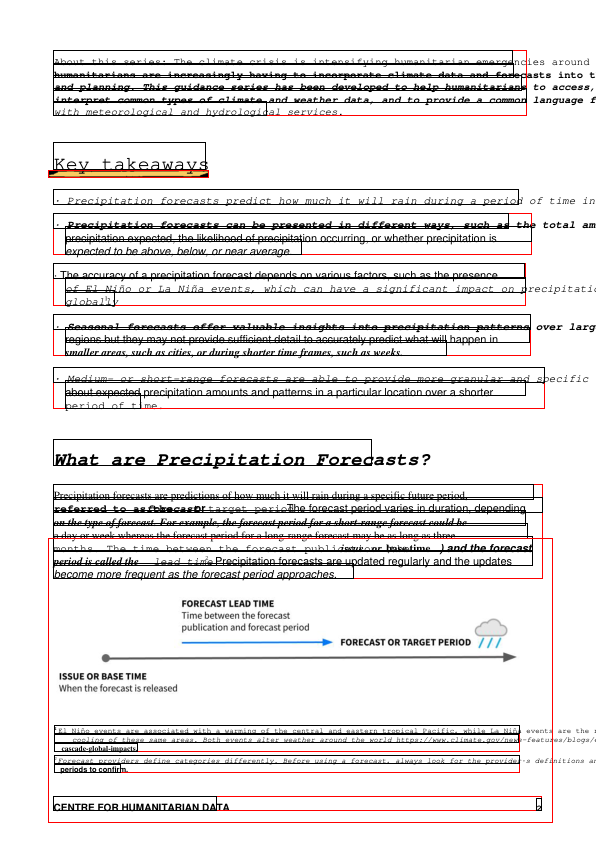

In [51]:
draw = ImageDraw.Draw(img)
for block in label:
    draw.rectangle(block['bbox'], outline='red')
    if 'lines' not in block:
        continue
    for line in block['lines']:
        draw.rectangle(line['bbox'], outline='black')
        # for span in line['spans']:
        #     draw.rectangle(span['bbox'], outline='blue')
img

In [24]:
!pip install pymupdf

  Obtaining dependency information for pymupdf from https://files.pythonhosted.org/packages/ad/41/18390c417052b46ad6d7d2ede9581798d5eac8a40388d5604e6ae7862928/PyMuPDF-1.23.25-cp311-none-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for PyMuPDFb==1.23.22 from https://files.pythonhosted.org/packages/65/33/4a3732db87ca2ea72ad6b3496f921b25d040f4ac853da1932d8cceb5cc33/PyMuPDFb-1.23.22-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 2.3 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 6.0 MB/s eta 0:00:0000:0100:01


In [1]:
import fitz

doc = fitz.open()
page = doc.new_page()
fonts = fitz.Base14_fontdict
del fonts['symb']
del fonts['zadb']
del fonts['symbol']
del fonts['zapfdingbats']

fonts = list(fonts.keys())

for i, font in enumerate(fonts):
    text = f"Hello World!"
    page.insert_text((50, 20 * i), text, fontname=font)
    page.insert_text((50, 20 * i + 10), f'{font} - {i}')
doc.save("fonts.pdf")
print(len(fonts))

24


In [54]:
doc = fitz.open('pdfs/guidance_precipitationforecasts.pdf')
page = doc[4]

In [55]:
blocks = page.get_text('dict')['blocks']
blocks

[{'number': 0,
  'type': 0,
  'bbox': (53.62139892578125,
   796.900146484375,
   541.7611694335938,
   810.7430419921875),
  'lines': [{'spans': [{'size': 9.0,
      'flags': 0,
      'font': 'OpenSans-Regular',
      'color': 5279949,
      'ascender': 1.06884765625,
      'descender': -0.29296875,
      'text': '5',
      'origin': (536.6151733398438, 808.1063232421875),
      'bbox': (536.6151733398438,
       798.4866943359375,
       541.7611694335938,
       810.7430419921875)}],
    'wmode': 0,
    'dir': (1.0, 0.0),
    'bbox': (536.6151733398438,
     798.4866943359375,
     541.7611694335938,
     810.7430419921875)},
   {'spans': [{'size': 10.0,
      'flags': 0,
      'font': 'OpenSans-Regular',
      'color': 5279949,
      'ascender': 1.06884765625,
      'descender': -0.29296875,
      'text': 'CENTRE FOR HUMANITARIAN DATA',
      'origin': (53.62139892578125, 807.588623046875),
      'bbox': (53.62139892578125,
       796.900146484375,
       216.0175018310547,
       

In [57]:
for block in blocks:
    if 'lines' not in block:
        print(block)